
#20PITE53J- TSF Mini Project

####The Dataset should be different for all. After the completion of the Mini Project, All have to submit the Google Form with every data required in that

<!--
<p style="font-family: Arial; font-size:1.4em;color:gold;"> Golden </p>

<span style='color:blue '> your message/text </span>

This <span style="color:red">word</span> is not black. -->


<!--

\renewcommand\arraystretch{1.5} %\setlength\minrowclearance{2.4pt}
\begin{flushright}
	\begin{tabular}{|c|c|c|c|c|c|c|c|c|c|c|c|c|c|c|c|}
		\hline
		Reg. No. & \hspace{0.3cm} & \hspace{0.3cm} &\hspace{0.3cm} &\hspace{0.3cm} &\hspace{0.3cm} &\hspace{0.3cm} &\hspace{0.3cm} &\hspace{0.3cm} &\hspace{0.3cm} &\hspace{0.3cm} &\hspace{0.3cm} &\hspace{0.3cm} &\hspace{0.3cm} &\hspace{0.3cm} & \hspace{0.3cm}  \\
		\hline
	\end{tabular}
\end{flushright}
 -->

<!--
<table>
    <tr>
        <td>Reg. No.</td>
        <td></td>
        <td></td>
        <td></td>
        <td></td>
        <td></td>
        <td></td>
        <td></td>
        <td></td>
        <td></td>
        <td></td>
        <td></td>
        <td></td>
        <td></td>
        <td></td>
        <td></td>
        <td></td>
    </tr>
</table> -->


| Reg. No. | P | A | 2 | 2 | 1 | 2 | 0 | 5 | 2 | 0 | 1 | 0 | 0 | 3 | 9 |   |
|----------|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|

| Name     | V | I | N | O | D |   | A |   |   |   |   |   |   |   |   |   |
|----------|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|


- Choose any one data from any repository like **{Kaggle or other sources}** and *{interpret}* your results in well manner.
-Identify the best forecast for the data among the following (for multivariate problem use any two columns in the dataset)
    - AR, MA, ARMA, ARIMA model
	- VAR model
	- VARMA model


<!--
\renewcommand{\arraystretch}{2.5}
\begin{tabular}[htbp!]{|c|c|c|c|}\hline
	%%\begin{TAB}(r,0.5cm,1cm)[3pt]{|c|c|c|c|}{|c|c|}% (rows,min,max)[tabcolsep]{columns}{rows}
	%%	\hline
	\textbf{Component}&\textbf{Procedure and Analysis} & \textbf{Interpretation} & \textbf{Viva} \\\hline
	\textbf{Max. Marks}& \textbf{10} & \textbf{5} & \textbf{5} \\\hline
	\textbf{Secured} &  &  &  \\\hline
	%%%%\textbf{Secured} & \color{white}{\textbf{Procedure and Analysis}} & \color{white}{\textbf{Interpretation}} & \color{white}{\textbf{Viva}} \\\hline
	%%%%%%\end{TAB}
\end{tabular} -->



In [1]:
import pandas as pd
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.statespace.varmax import VARMAX
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('DailyDelhiClimateTrain.csv', index_col='date', parse_dates=True)
data.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [3]:
len(data)

1462

In [4]:
# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]

In [5]:
len(train_data)

1169

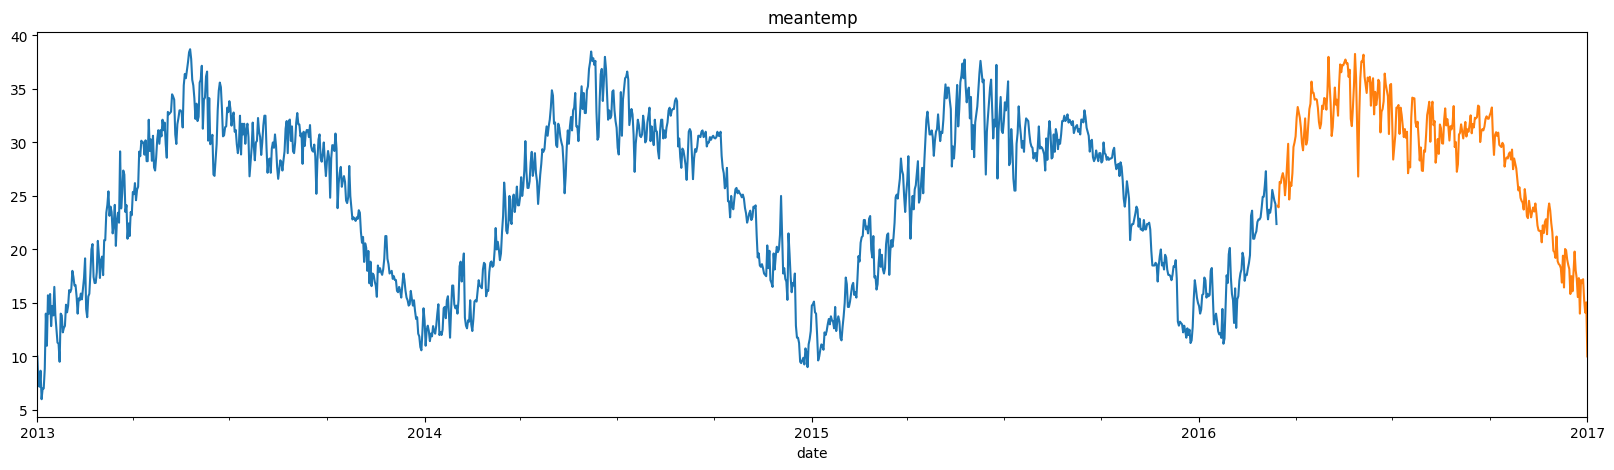

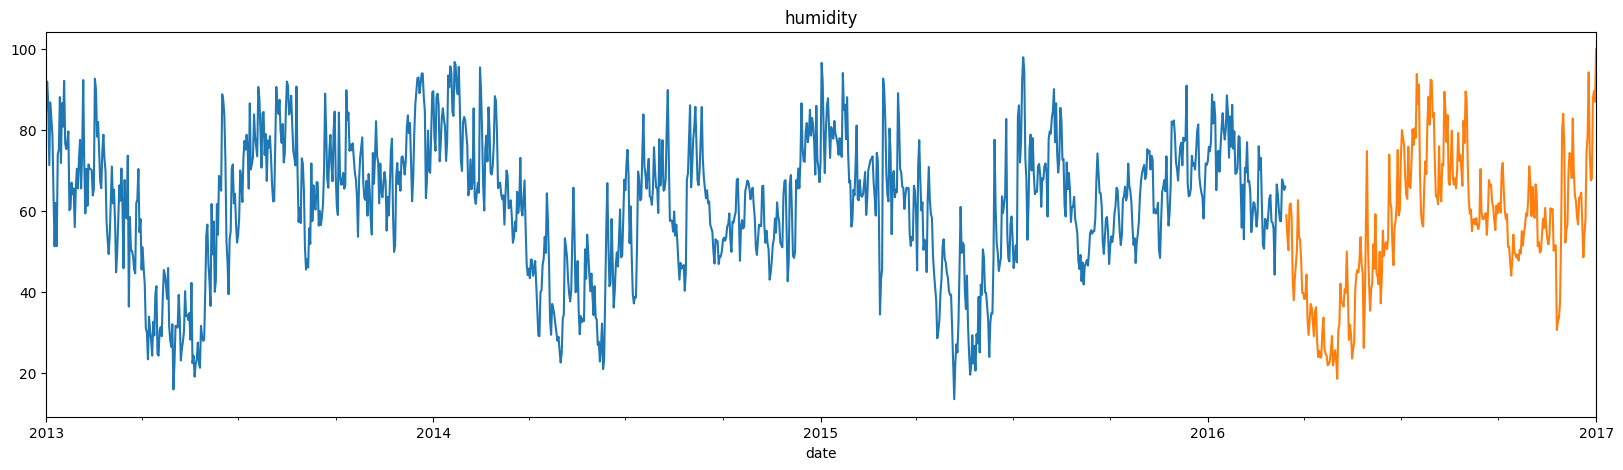

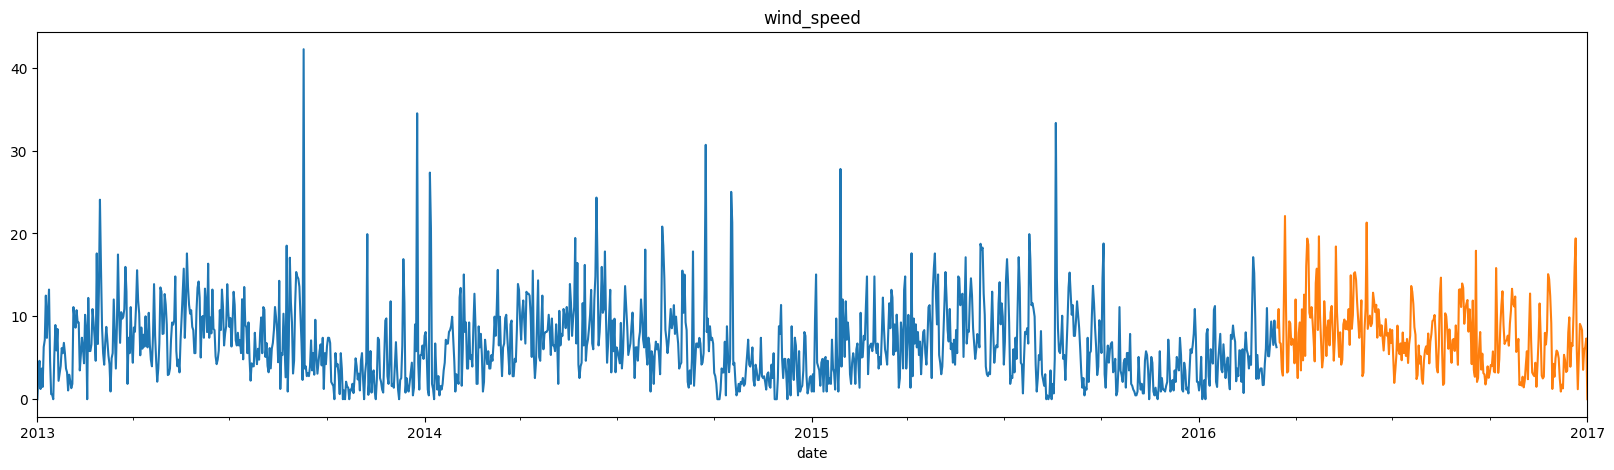

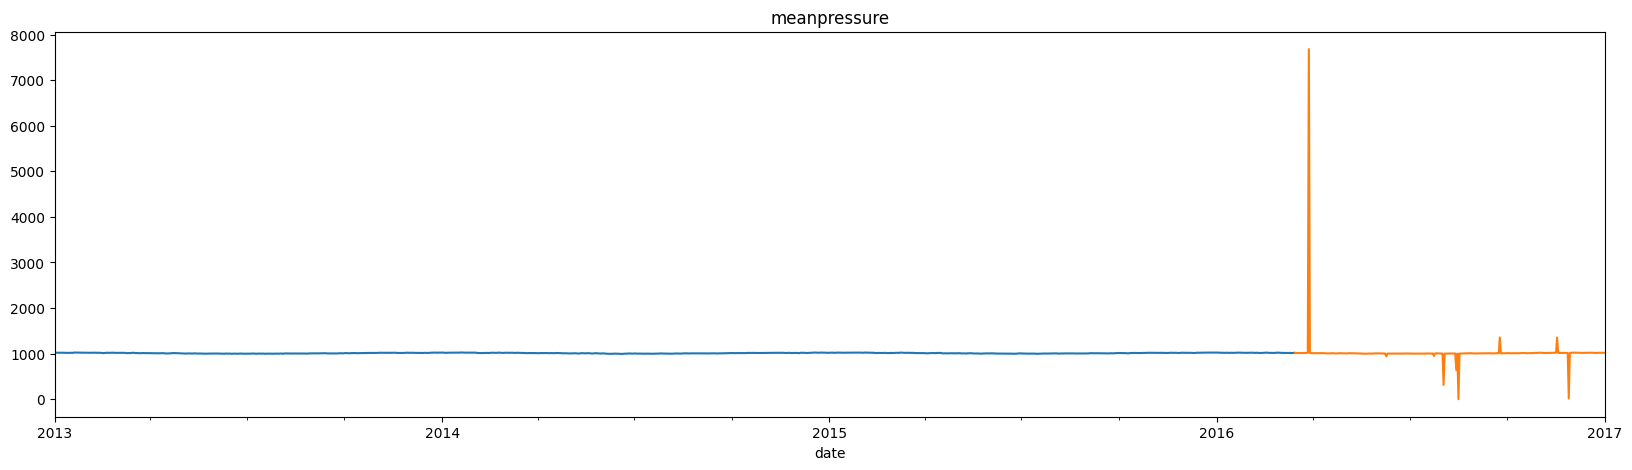

In [6]:
for i,col in enumerate(data.columns):
    plt.figure(figsize=(20,5))
    plt.title(col)
    train_data[col].plot()
    test_data[col].plot()
plt.show()

In [7]:
def ADF(data):
    result = adfuller(data)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]:.20f}')
    for key, value in result[4].items():
        print('Critial Values:', f'   {key}, {value}')

In [8]:
ADF(data['meantemp'])

ADF Statistic: -2.02106905592067
p-value: 0.27741213723016155956
Critial Values:    1%, -3.4348647527922824
Critial Values:    5%, -2.863533960720434
Critial Values:    10%, -2.567831568508802


In [9]:
data_first_diff_train= pd.Series(train_data['meantemp'] - train_data['meantemp'].shift(), index=train_data['meantemp'].index)
data_first_diff_train.dropna(inplace=True)
data_first_diff_train

date
2013-01-02   -2.600000
2013-01-03   -0.233333
2013-01-04    1.500000
2013-01-05   -2.666667
2013-01-06    1.000000
                ...   
2016-03-10    1.562500
2016-03-11   -0.495833
2016-03-12   -0.504167
2016-03-13   -0.312500
2016-03-14   -1.875000
Name: meantemp, Length: 1168, dtype: float64

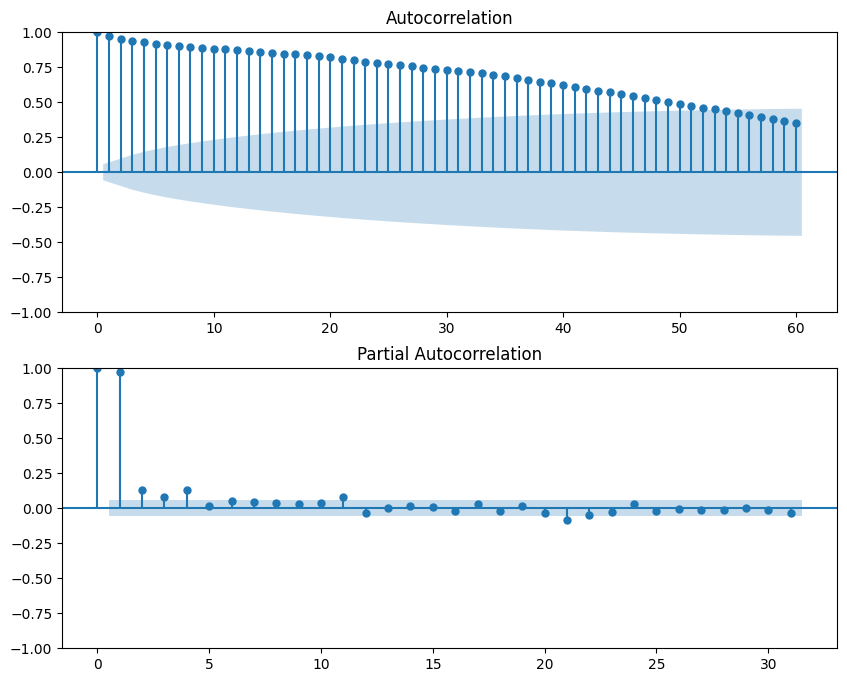

In [10]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(train_data['meantemp'], lags=60, ax=ax[0]) #q
plot_pacf(train_data['meantemp'], ax=ax[1]) #p
plt.show()

In [11]:
# AR model
ar_model = AutoReg(train_data['meantemp'], lags=55)
ar_fit = ar_model.fit()
ar_pred = ar_fit.predict(start=len(train_data), end=len(train_data)+len(test_data)-1)
ar_rmse = mean_squared_error(test_data['meantemp'], ar_pred, squared=False)

<Axes: xlabel='date'>

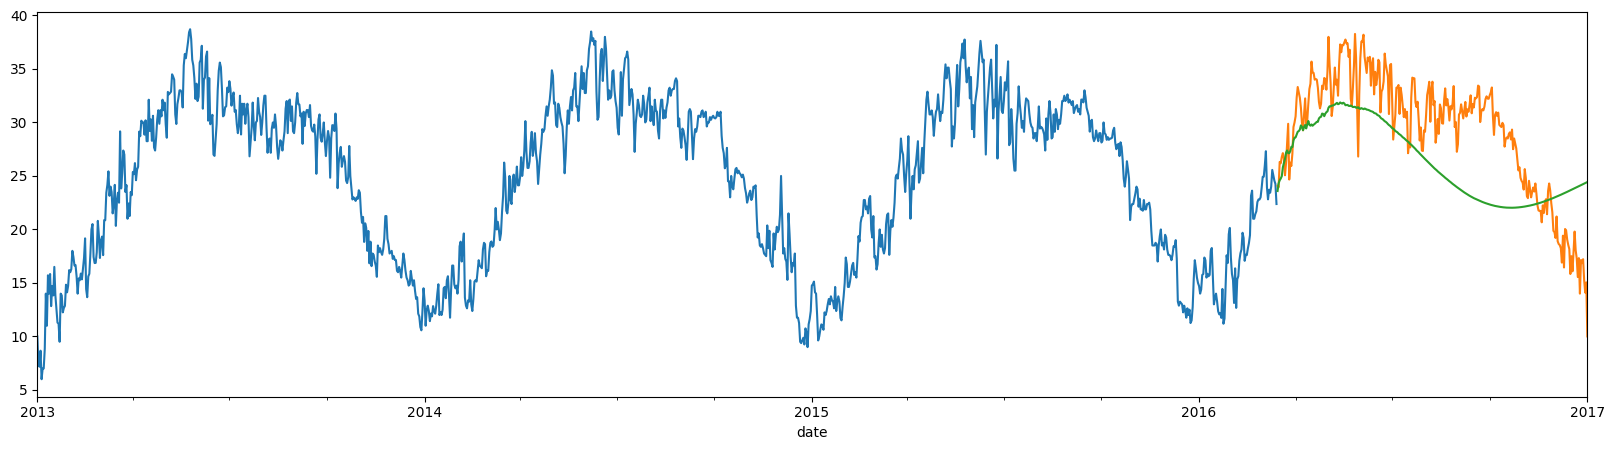

In [12]:
plt.figure(figsize=(20,5))
train_data['meantemp'].plot()
test_data['meantemp'].plot()
ar_pred.plot()

In [13]:
# MA model
ma_model = ARIMA(train_data['meantemp'], order=(0,0,55))
ma_fit = ma_model.fit()
ma_pred = ma_fit.predict(start=len(train_data), end=len(train_data)+len(test_data)-1)
ma_rmse = mean_squared_error(test_data['meantemp'], ma_pred, squared=False)

<Axes: xlabel='date'>

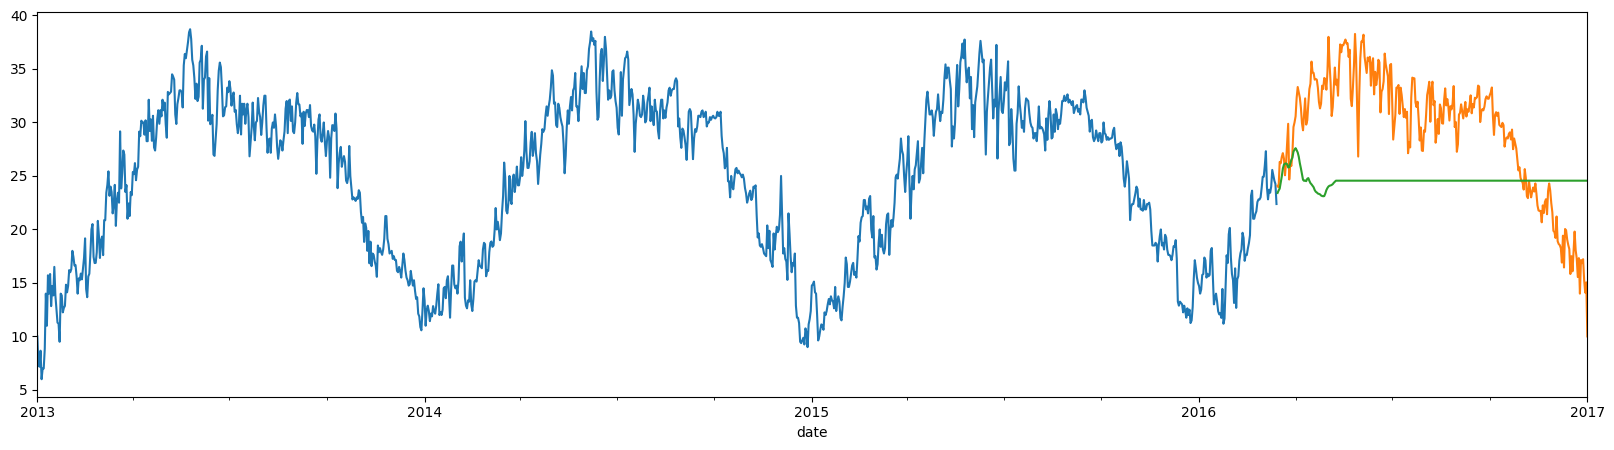

In [14]:
plt.figure(figsize=(20,5))
train_data['meantemp'].plot()
test_data['meantemp'].plot()
ma_pred.plot()

In [15]:
# ARMA model
arma_model = ARIMA(train_data['meantemp'], order=(5,0,55))
arma_fit = arma_model.fit()
arma_pred = arma_fit.predict(start=len(train_data), end=len(train_data)+len(test_data)-1)
arma_rmse = mean_squared_error(test_data['meantemp'], arma_pred, squared=False)


<Axes: xlabel='date'>

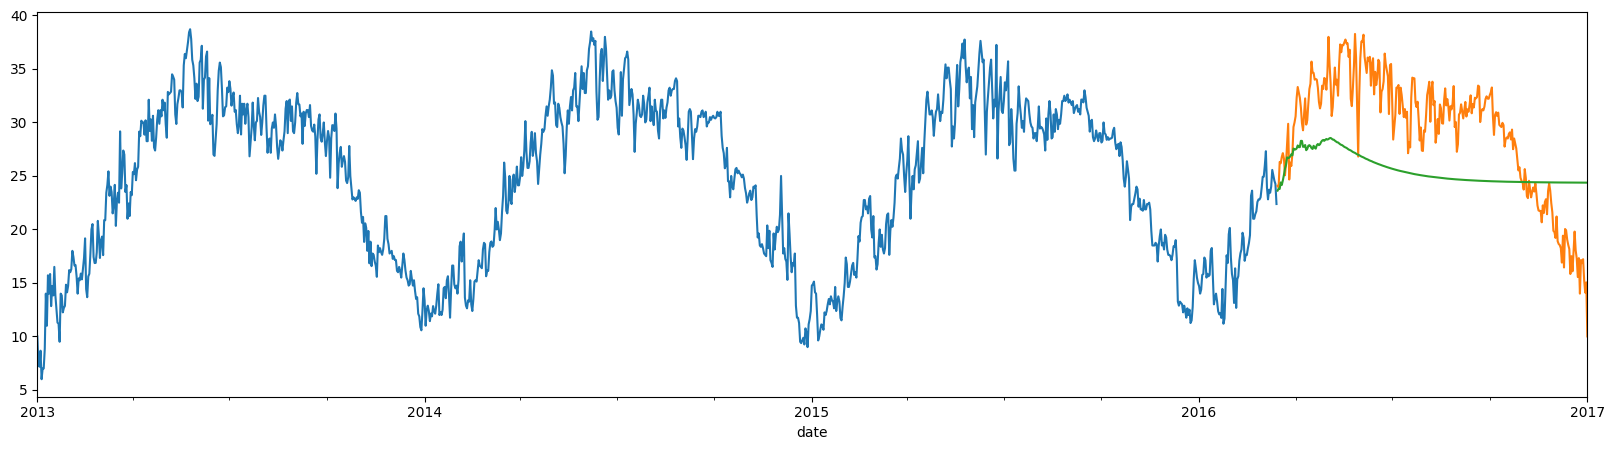

In [16]:
plt.figure(figsize=(20,5))
train_data['meantemp'].plot()
test_data['meantemp'].plot()
arma_pred.plot()

In [22]:
# ARIMA model
arima_model = ARIMA(train_data['meantemp'], order=(5,1,55))
arima_fit = arima_model.fit()
arima_pred = arima_fit.forecast(steps=len(test_data))
arima_rmse = mean_squared_error(test_data['meantemp'], arima_pred, squared=False)

<Axes: xlabel='date'>

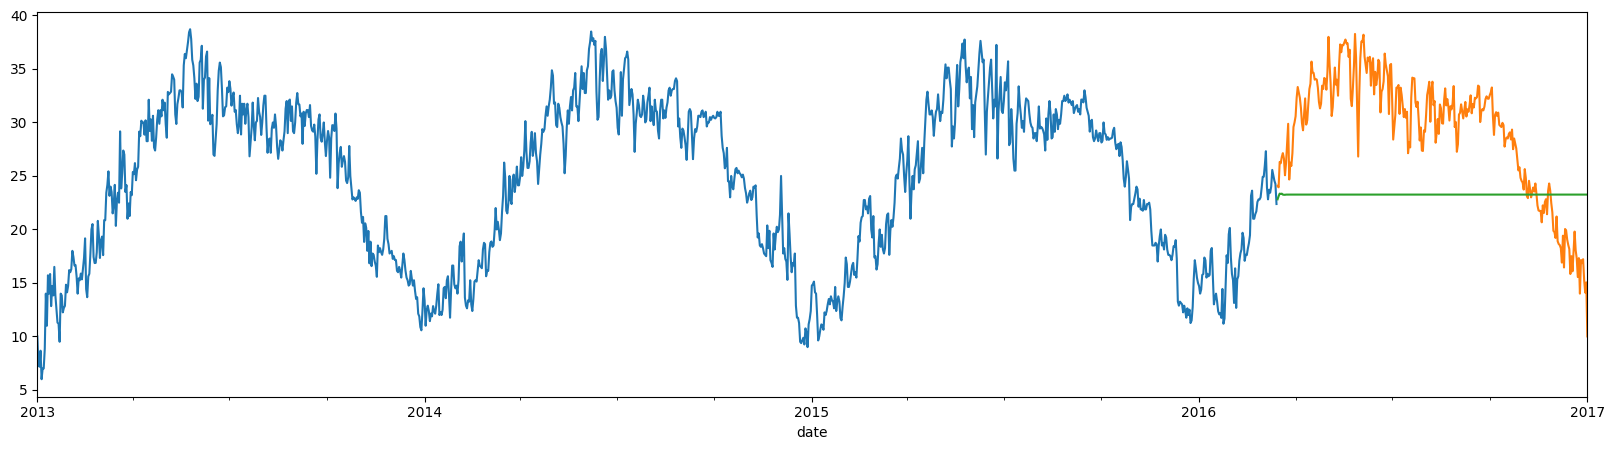

In [18]:
plt.figure(figsize=(20,5))
train_data['meantemp'].plot()
test_data['meantemp'].plot()
arima_pred.plot()

In [19]:
# VAR model
var_model = VAR(train_data[['meantemp', 'humidity']])
var_fit = var_model.fit()
var_pred = var_fit.forecast(train_data[['meantemp', 'humidity']].values, steps=len(test_data))
var_rmse = mean_squared_error(test_data['meantemp'], var_pred[:, 0], squared=False)

In [20]:
# VARMA model
varma_model = VARMAX(train_data[['meantemp', 'humidity']], order=(2, 1))
varma_fit = varma_model.fit(disp=False)
varma_pred = varma_fit.forecast(len(test_data))
varma_rmse = mean_squared_error(test_data['meantemp'], varma_pred['meantemp'], squared=False)

In [21]:
# Compare results
print("AR RMSE:", ar_rmse)
print("MA RMSE:", ma_rmse)
print("ARMA RMSE:", arma_rmse)
print("ARIMA RMSE:", arima_rmse)
print("VAR RMSE:", var_rmse)
print("VARMA RMSE:", varma_rmse)

AR RMSE: 5.32602395951032
MA RMSE: 7.364610167765573
ARMA RMSE: 6.207277328751691
ARIMA RMSE: 8.230701680851267
VAR RMSE: 7.400163679716796
VARMA RMSE: 8.187288086100237
